## Keras_fashion_minst辨識

In [1]:
import numpy as np  
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os

In [2]:
(X_trains, y_trains), (X_tests, y_tests)= tf.keras.datasets.fashion_mnist.load_data()
print ("X_trains.shape:",X_trains.shape,"y_trains.shape:", y_trains.shape)

X_trains.shape: (60000, 28, 28) y_trains.shape: (60000,)


y = 0 T-shirt/top


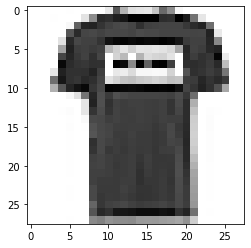

In [3]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
img = 1
#img = X_trains[4].reshape(28, 28)
label_index = y_trains[img]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(X_trains[img], cmap='Greys')

In [4]:
data = X_trains[1].copy()
data[data>0]=1
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image


['[0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]',
 '[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0]',
 '[0 0 0

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_trains) 
y_TestOneHot = np_utils.to_categorical(y_tests) 
y_TestOneHot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [6]:
X_train_2D = X_trains.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_tests.reshape(10000, 28*28).astype('float32')  
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

In [7]:
# 建立簡單的線性執行的模型
model= keras.models.Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer="normal", activation='relu'))
model.add(Dense(units=10, kernel_initializer="normal", activation="softmax"))
#編譯損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#進行訓練
train_history=model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=25, batch_size=800, verbose=2)

Epoch 1/25


60/60 - 1s - loss: 0.8365 - accuracy: 0.7234 - val_loss: 0.5435 - val_accuracy: 0.8152


Epoch 2/25


60/60 - 1s - loss: 0.5033 - accuracy: 0.8286 - val_loss: 0.4728 - val_accuracy: 0.8379


Epoch 3/25


60/60 - 1s - loss: 0.4425 - accuracy: 0.8489 - val_loss: 0.4374 - val_accuracy: 0.8454


Epoch 4/25


60/60 - 1s - loss: 0.4110 - accuracy: 0.8573 - val_loss: 0.4138 - val_accuracy: 0.8556


Epoch 5/25


60/60 - 1s - loss: 0.3889 - accuracy: 0.8654 - val_loss: 0.3936 - val_accuracy: 0.8610


Epoch 6/25


60/60 - 1s - loss: 0.3726 - accuracy: 0.8681 - val_loss: 0.3816 - val_accuracy: 0.8662


Epoch 7/25


60/60 - 1s - loss: 0.3534 - accuracy: 0.8766 - val_loss: 0.3728 - val_accuracy: 0.8696


Epoch 8/25


60/60 - 1s - loss: 0.3460 - accuracy: 0.8776 - val_loss: 0.3822 - val_accuracy: 0.8668


Epoch 9/25


60/60 - 1s - loss: 0.3355 - accuracy: 0.8817 - val_loss: 0.3735 - val_accuracy: 0.8711


Epoch 10/25


60/60 - 1s - loss: 0.3212 - accuracy: 0.8870 - val_loss: 0.3513 - val_accuracy: 0.8760


Epoch 11/25


60/60 - 1s - loss: 0.3117 - accuracy: 0.8889 - val_loss: 0.3472 - val_accuracy: 0.8766


Epoch 12/25


60/60 - 1s - loss: 0.3031 - accuracy: 0.8917 - val_loss: 0.3453 - val_accuracy: 0.8759


Epoch 13/25


60/60 - 1s - loss: 0.2954 - accuracy: 0.8940 - val_loss: 0.3463 - val_accuracy: 0.8770


Epoch 14/25


60/60 - 1s - loss: 0.2905 - accuracy: 0.8959 - val_loss: 0.3377 - val_accuracy: 0.8792


Epoch 15/25


60/60 - 1s - loss: 0.2807 - accuracy: 0.8991 - val_loss: 0.3297 - val_accuracy: 0.8827


Epoch 16/25


60/60 - 1s - loss: 0.2753 - accuracy: 0.9017 - val_loss: 0.3334 - val_accuracy: 0.8800


Epoch 17/25


60/60 - 1s - loss: 0.2714 - accuracy: 0.9021 - val_loss: 0.3301 - val_accuracy: 0.8821


Epoch 18/25


60/60 - 1s - loss: 0.2653 - accuracy: 0.9050 - val_loss: 0.3308 - val_accuracy: 0.8817


Epoch 19/25


60/60 - 1s - loss: 0.2591 - accuracy: 0.9079 - val_loss: 0.3242 - val_accuracy: 0.8839


Epoch 20/25


60/60 - 1s - loss: 0.2549 - accuracy: 0.9083 - val_loss: 0.3280 - val_accuracy: 0.8847


Epoch 21/25


60/60 - 1s - loss: 0.2540 - accuracy: 0.9092 - val_loss: 0.3157 - val_accuracy: 0.8866


Epoch 22/25


60/60 - 1s - loss: 0.2461 - accuracy: 0.9112 - val_loss: 0.3193 - val_accuracy: 0.8863


Epoch 23/25


60/60 - 1s - loss: 0.2415 - accuracy: 0.9135 - val_loss: 0.3199 - val_accuracy: 0.8863


Epoch 24/25


60/60 - 1s - loss: 0.2371 - accuracy: 0.9147 - val_loss: 0.3165 - val_accuracy: 0.8873


Epoch 25/25


60/60 - 1s - loss: 0.2322 - accuracy: 0.9171 - val_loss: 0.3270 - val_accuracy: 0.8841


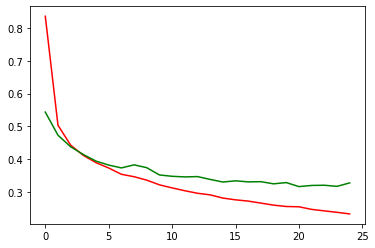

In [8]:
plt.plot(train_history.history["loss"], "r")
plt.plot(train_history.history["val_loss"], "g")

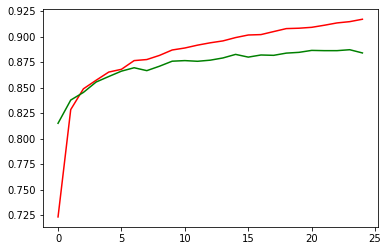

In [9]:
plt.plot(train_history.history["accuracy"], "r")
plt.plot(train_history.history["val_accuracy"], "g")

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
scores = model.evaluate(x_Test_norm, y_TestOneHot)   
print(f"準確度 = {scores[1]*100.0:2.1f}")

  1/313 [..............................] - ETA: 0s - loss: 0.3200 - accuracy: 0.9062

 17/313 [>.............................] - ETA: 0s - loss: 0.3233 - accuracy: 0.8879

 32/313 [==>...........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.8799

 47/313 [===>..........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.8830

 62/313 [====>.........................] - ETA: 0s - loss: 0.3295 - accuracy: 0.8861

 77/313 [======>.......................] - ETA: 0s - loss: 0.3198 - accuracy: 0.8900

 92/313 [=======>......................] - ETA: 0s - loss: 0.3397 - accuracy: 0.8845

106/313 [=========>....................] - ETA: 0s - loss: 0.3455 - accuracy: 0.8821

120/313 [==========>...................] - ETA: 0s - loss: 0.3504 - accuracy: 0.8797

136/313 [============>.................] - ETA: 0s - loss: 0.3527 - accuracy: 0.8784

152/313 [=============>................] - ETA: 0s - loss: 0.3503 - accuracy: 0.8773

167/313 [===============>..............] - ETA: 0s - loss: 0.3565 - accuracy: 0.8756

182/313 [================>.............] - ETA: 0s - loss: 0.3601 - accuracy: 0.8745

198/313 [=================>............] - ETA: 0s - loss: 0.3565 - accuracy: 0.8752

214/313 [===================>..........] - ETA: 0s - loss: 0.3565 - accuracy: 0.8753

229/313 [====================>.........] - ETA: 0s - loss: 0.3549 - accuracy: 0.8758

246/313 [======================>.......] - ETA: 0s - loss: 0.3461 - accuracy: 0.8786

262/313 [========================>.....] - ETA: 0s - loss: 0.3456 - accuracy: 0.8795

278/313 [=========================>....] - ETA: 0s - loss: 0.3479 - accuracy: 0.8789

294/313 [===========================>..] - ETA: 0s - loss: 0.3487 - accuracy: 0.8785

310/313 [============================>.] - ETA: 0s - loss: 0.3458 - accuracy: 0.8797

313/313 [==============================] - 1s 3ms/step - loss: 0.3467 - accuracy: 0.8794


準確度 = 87.9
